In [1]:
import numpy as np

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


!pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.6 MB/s eta 0:00:00


In [2]:

# no_coating = [ np.round(i,2) for i in np.random.normal(11,0.5,30)];
# coating_a = [ np.round(i,2) for i in np.random.normal(11.25,1.5,30)];
# coating_b = [ np.round(i,2) for i in np.random.normal(11.75,1.15,30)];

no_coating = [9.98, 11.11, 11.24, 10.17, 11.86, 11.1 , 11.3 , 11.34, 10.96,
       10.31, 10.15, 11.01, 10.42, 11.01, 11.62, 10.81, 10.79, 11.42,
       10.86, 11.1 , 11.68, 11.69, 11.97, 11.26, 10.64, 10.88, 11.76,
       10.8 , 10.61, 11.41]

coating_a = [12.27, 12.47, 13.09,  9.38,  8.35,  9.96, 11.6 ,  7.96,  8.79,
       10.14, 10.32, 12.18, 11.06, 13.76, 11.35, 13.22,  7.86, 10.97,
       13.54,  8.23,  9.71, 12.32, 10.15, 11.04, 10.13,  9.98, 11.97,
       10.57, 12.36, 13.32]

coating_b =[12.47,  9.74, 12.23, 12.46, 11.77, 10.49, 12.2 , 10.17, 10.08,
       11.45, 12.66, 13.  , 11.44, 10.6 , 11.78, 13.91, 11.72, 12.42,
       14.44, 12.02, 11.36, 10.3 , 13.39, 11.07, 12.26, 10.27, 11.51,
       10.28, 10.86, 11.73]


In [3]:
no_coating_df = pd.DataFrame(no_coating,columns=['QE'])
coating_a_df = pd.DataFrame(coating_a,columns=['QE'])
coating_b_df = pd.DataFrame(coating_b,columns=['QE'])

no_coating_df['Sensor Treatment'] = 'none'
coating_a_df['Sensor Treatment'] = 'coating A'
coating_b_df['Sensor Treatment'] = 'coating B'

coating_a_df.head()

,QE,Sensor Treatment
0,12.27,coating A
1,12.47,coating A
2,13.09,coating A
3,9.38,coating A
4,8.35,coating A


### Examples of how to concatenate our three prepared dataframes into one merged dataframe

In [4]:
no_coating_df['ObsID'] = np.arange(1,len(no_coating_df)+1)
coating_a_df['ObsID'] = np.arange(1,len(coating_a_df)+1)
coating_b_df['ObsID'] = np.arange(1,len(coating_b_df)+1)

coating_a_df.head()

,QE,Sensor Treatment,ObsID
0,12.27,coating A,1
1,12.47,coating A,2
2,13.09,coating A,3
3,9.38,coating A,4
4,8.35,coating A,5


In [5]:
concatDF = pd.concat([no_coating_df,coating_a_df,coating_b_df])
concatDF

,QE,Sensor Treatment,ObsID
0,9.98,none,1
1,11.11,none,2
2,11.24,none,3
3,10.17,none,4
4,11.86,none,5
...,...,...,...
25,10.27,coating B,26
26,11.51,coating B,27
27,10.28,coating B,28
28,10.86,coating B,29


In [6]:
concatDF = pd.concat([no_coating_df,coating_a_df,coating_b_df])
concatDF

concatDF = concatDF.reset_index(drop='0')
concatDF.head()

,QE,Sensor Treatment,ObsID
0,9.98,none,1
1,11.11,none,2
2,11.24,none,3
3,10.17,none,4
4,11.86,none,5


In [7]:
concatDF = pd.concat([no_coating_df,coating_a_df,coating_b_df],ignore_index=True,sort=False)
concatDF

,QE,Sensor Treatment,ObsID
0,9.98,none,1
1,11.11,none,2
2,11.24,none,3
3,10.17,none,4
4,11.86,none,5
...,...,...,...
85,10.27,coating B,26
86,11.51,coating B,27
87,10.28,coating B,28
88,10.86,coating B,29


https://pingouin-stats.org/build/html/generated/pingouin.rm_anova.html

# T-tests between two groups

Grab data for only groups where a sensor treatment has been applied (two groups!)

In [8]:
two_group_df = pd.concat([coating_a_df,coating_b_df])
two_group_df.head()

,QE,Sensor Treatment,ObsID
0,12.27,coating A,1
1,12.47,coating A,2
2,13.09,coating A,3
3,9.38,coating A,4
4,8.35,coating A,5


<Axes: xlabel='Sensor Treatment', ylabel='QE'>

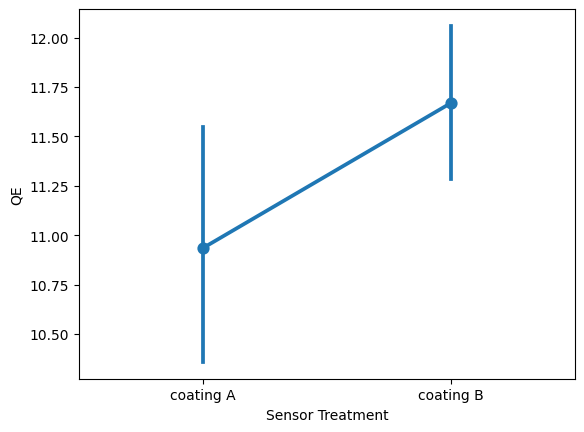

In [9]:
sns.pointplot(two_group_df, y='QE', x='Sensor Treatment')

### Unpaired ttest

First, test normality using the Shapiro-Wilk test.
https://pingouin-stats.org/build/html/generated/pingouin.normality.html

The null hypothesis is that the data is normally distributed.  If p<0.05 (or whatever alpha is) then it is unlikely that our data is normally distributed.

In [50]:
pg.normality(two_group_df['QE'])

,W,pval,normal
QE,0.98028,0.44048,True


Becuase the variable is normally distributed, we can continue using our normal parametric tests.  If it were not, we would have to look up the appropriate non-parametric test to use instead of an unpaired ttest.

In [51]:
pg.ttest(coating_a_df['QE'], coating_b_df['QE'], paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.928586,58,two-sided,0.058681,"[-1.5, 0.03]",0.497959,1.224,0.474803


### Paired ttest

In [52]:
pg.normality(two_group_df['QE'])

,W,pval,normal
QE,0.98028,0.44048,True


In [11]:
pg.ttest(coating_a_df['QE'], coating_a_df['QE'], paired=True)

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:248: UserWarning: x and y are equals. Cannot compute T or p-value.
  warnings.warn("x and y are equals. Cannot compute T or p-value.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,NaN,29,two-sided,NaN,"[nan, nan]",0.0,nan,0.05



# Anovas
---



<Axes: xlabel='Sensor Treatment', ylabel='QE'>

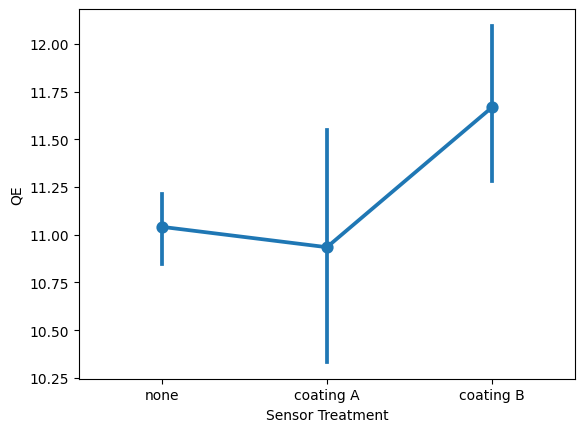

In [12]:
sns.pointplot(concatDF, y='QE', x='Sensor Treatment')

# One-way, between-subject ANOVA

In [54]:
pg.normality(concatDF['QE'])

,W,pval,normal
QE,0.981913,0.244714,True


In [13]:
pg.anova(concatDF, dv='QE', between='Sensor Treatment')

,Source,ddof1,ddof2,F,p-unc,np2
0,Sensor Treatment,2,87,3.063656,0.051789,0.065795


Post-hoc tests, which are only appropriate if the ANOVA revealed significant difference.  In this case, it does not, but for the sake of demonstration...

Here are the results of pairwise t-tests using Bonferroni correction.

<!-- pingouin.ptests(self, paired=False, decimals=3, padjust=None, stars=True, pval_stars={0.001: '***', 0.01: '**', 0.05: '*'}, **kwargs)¶ -->

https://pingouin-stats.org/build/html/generated/pingouin.ptests.html#pingouin.ptests

This is an unusual outcome.  My current understanding is that the significant difference of 'coating B' vs 'none' is due to type 1 error, but I may update this in the future.

In [14]:
pg.pairwise_tests(concatDF, dv='QE',between='Sensor Treatment',  padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Sensor Treatment,coating A,coating B,False,True,-1.928586,58.0,two-sided,0.058681,0.176044,bonf,1.224,-0.491492
1,Sensor Treatment,coating A,none,False,True,-0.324309,58.0,two-sided,0.746871,1.000000,bonf,0.274,-0.082649
2,Sensor Treatment,coating B,none,False,True,2.690361,58.0,two-sided,0.009308,0.027923,bonf,4.987,0.685627


This is a strange case where the ANOVA is not significant, but one of our post-hoc multiple comparisons *is* significant.  

Here are some writings on what to do in this case:
https://help.xlstat.com/6741-how-interpret-contradictory-results-between-anova-and

Note that an alternative and generally more accepted post-hoc test is the pairwise Tukey-test, which does a better job at controlling for type 1 error.  It does NOT reveal a significant difference at any level.  Note that pairwise Tukey cannot be used on a repeated measures design.

In [15]:
pg.pairwise_tukey(concatDF, dv='QE',between='Sensor Treatment')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,coating A,coating B,10.935000,11.669333,-0.734333,0.320524,-2.291038,0.062371,-0.491492
1,coating A,none,10.935000,11.042000,-0.107000,0.320524,-0.333828,0.940463,-0.082649
2,coating B,none,11.669333,11.042000,0.627333,0.320524,1.957210,0.129103,0.685627


# One-way, within-subject (repeated measures) ANOVA

In [55]:
pg.normality(concatDF['QE'])

,W,pval,normal
QE,0.981913,0.244714,True


In [16]:
pg.rm_anova(concatDF, dv='QE', subject='ObsID', within='Sensor Treatment')

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Sensor Treatment,2,58,3.349762,0.042003,0.065795,0.878208


Because the results are significant, it is appropriate to run posthoc tests (pairwise ttests using correction for type1 erro). Here are the results of pairwise t-tests using Bonferroni correction.

<!-- pingouin.ptests(self, paired=False, decimals=3, padjust=None, stars=True, pval_stars={0.001: '***', 0.01: '**', 0.05: '*'}, **kwargs)¶ -->

https://pingouin-stats.org/build/html/generated/pingouin.ptests.html#pingouin.ptests

In [17]:

pg.pairwise_tests(concatDF, dv='QE', subject='ObsID', within='Sensor Treatment',padjust='bonf')


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Sensor Treatment,coating A,coating B,True,True,-2.185126,29.0,two-sided,0.037106,0.111317,bonf,1.519,-0.491492
1,Sensor Treatment,coating A,none,True,True,-0.322714,29.0,two-sided,0.749227,1.000000,bonf,0.204,-0.082649
2,Sensor Treatment,coating B,none,True,True,2.582409,29.0,two-sided,0.015127,0.045380,bonf,3.179,0.685627


This result suggests that the only difference is between 'coating B' and 'none'

# Two-way ANOVAs

First, I have to create some fake data.  This isn't so straightforward for this type of dataset, but here we go...

In [18]:
# small, medium, large sensor size with coating 1
s_1 = [ np.round(i,2) for i in np.random.normal(7.5,0.5,30)];
m_1 = [ np.round(i,2) for i in np.random.normal(8.25,1.5,30)];
l_1 = [ np.round(i,2) for i in np.random.normal(9.75,1.15,30)];

# small, medium, large sensor size with coating 2
s_2 = s_1 + np.random.normal(0.45,0.5,len(s_1))
m_2 = m_1 + np.random.normal(0.4,0.5,len(s_1))
l_2 = l_1 + np.random.normal(0.05,0.15,len(s_1))

# small, medium, large sensor size with coating 3
s_3 = s_2 + np.random.normal(0.45,0.5,len(s_1))
m_3 = m_2 + np.random.normal(0.4,0.5,len(s_1))
l_3 = l_2 + np.random.normal(0.05,0.15,len(s_1))


In [19]:
# s_1

s_1 = pd.DataFrame(s_1,columns=['QE'])
m_1 = pd.DataFrame(m_1,columns=['QE'])
l_1 = pd.DataFrame(l_1,columns=['QE'])

s_2 = pd.DataFrame(s_2,columns=['QE'])
m_2 = pd.DataFrame(m_2,columns=['QE'])
l_2 = pd.DataFrame(l_2,columns=['QE'])

s_3 = pd.DataFrame(s_3,columns=['QE'])
m_3 = pd.DataFrame(m_3,columns=['QE'])
l_3 = pd.DataFrame(l_3,columns=['QE'])

s_1['pixel size'] = 'small'
m_1['pixel size'] = 'medium'
l_1['pixel size'] = 'large'

s_2['pixel size'] = 'small'
m_2['pixel size'] = 'medium'
l_2['pixel size'] = 'large'

s_3['pixel size'] = 'small'
m_3['pixel size'] = 'medium'
l_3['pixel size'] = 'large'

s_1['sensor treatment'] = 'a'
m_1['sensor treatment'] = 'a'
l_1['sensor treatment'] = 'a'

s_2['sensor treatment'] = 'b'
m_2['sensor treatment'] = 'b'
l_2['sensor treatment'] = 'b'

s_3['sensor treatment'] = 'c'
m_3['sensor treatment'] = 'c'
l_3['sensor treatment'] = 'c'


s_1['observer id'] = np.arange(1,len(s_1)+1)
s_2['observer id'] = np.arange(1,len(s_1)+1)
s_3['observer id'] = np.arange(1,len(s_1)+1)

m_1['observer id'] = np.arange(1,len(s_1)+1)
m_2['observer id'] = np.arange(1,len(s_1)+1)
m_3['observer id'] = np.arange(1,len(s_1)+1)

l_1['observer id'] = np.arange(1,len(s_1)+1)
l_2['observer id'] = np.arange(1,len(s_1)+1)
l_3['observer id'] = np.arange(1,len(s_1)+1)

two_way_df = pd.concat([s_1, m_1, l_1, s_2, m_2, l_2, s_3, m_3,l_3])
two_way_df

,QE,pixel size,sensor treatment,observer id
0,7.310000,small,a,1
1,7.550000,small,a,2
2,8.230000,small,a,3
3,7.070000,small,a,4
4,7.850000,small,a,5
...,...,...,...,...
25,8.799757,large,c,26
26,7.907413,large,c,27
27,7.101158,large,c,28
28,10.578967,large,c,29


### Plot the interaction

<Axes: xlabel='sensor treatment', ylabel='QE'>

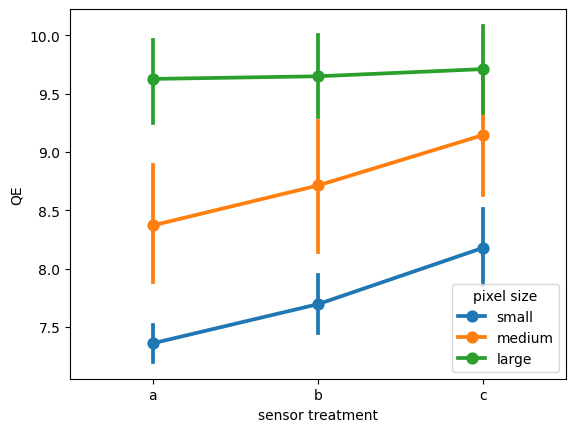

In [20]:
sns.pointplot(two_way_df, y='QE', x='sensor treatment',hue='pixel size')

### Plot the main effect of sensor treatment (collapse over pixel size)

<Axes: xlabel='sensor treatment', ylabel='QE'>

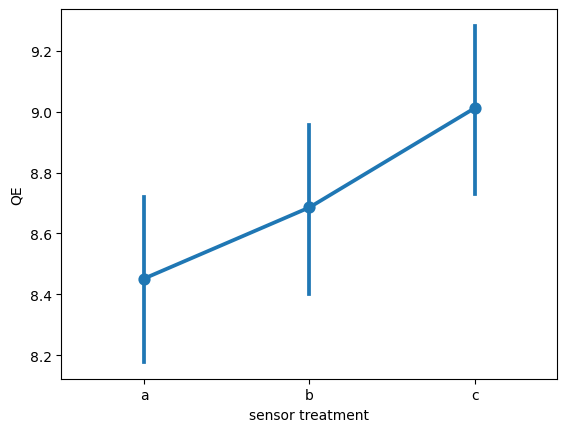

In [21]:
sns.pointplot(two_way_df, y='QE', x='sensor treatment')

### Plot the main effect of pixel size (collapse over sensor treatment)

<Axes: xlabel='pixel size', ylabel='QE'>

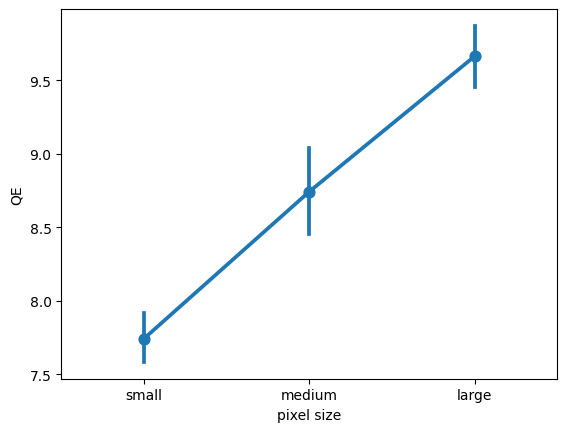

In [22]:
sns.pointplot(two_way_df, y='QE', x='pixel size')

### Two-way with a between-subjects design

Examine the effects of pixel size by collapsing across sensor treatment

In [23]:
means_ps_obs = two_way_df.groupby(['pixel size','observer id'])['QE'].agg(np.mean)
means_ps_obs = pd.DataFrame(means_ps_obs)
means_ps_obs.reset_index(inplace=True)
means_ps_obs

,pixel size,observer id,QE
0,large,1,9.037243
1,large,2,9.443585
2,large,3,10.171693
3,large,4,9.600705
4,large,5,10.687668
...,...,...,...
85,small,26,7.597801
86,small,27,8.261285
87,small,28,7.697329
88,small,29,7.574548


### For demonstration, let's test each main effect using a one-way ANOVA.

Note that this is NOT appropriate, because it doubles the chances of type1 error.

In [57]:
pg.normality(means_ps_obs['QE'])

,W,pval,normal
QE,0.986977,0.513215,True


In [24]:
pg.anova(means_ps_obs, dv='QE', between='pixel size')

,Source,ddof1,ddof2,F,p-unc,np2
0,pixel size,2,87,23.370567,7.525925e-09,0.34949


Examine the effects of sensor treatment by collapsing across pixel size

In [61]:
means_st_obs = two_way_df.groupby(['pixel size','observer id'])['QE'].agg(np.mean)
means_st_obs = pd.DataFrame(means_ps_obs)
means_st_obs.reset_index(inplace=True)
means_st_obs

,index,pixel size,observer id,QE
0,0,large,1,9.037243
1,1,large,2,9.443585
2,2,large,3,10.171693
3,3,large,4,9.600705
4,4,large,5,10.687668
...,...,...,...,...
85,85,small,26,7.597801
86,86,small,27,8.261285
87,87,small,28,7.697329
88,88,small,29,7.574548


In [64]:
pg.normality(means_ps_obs['QE'])

,W,pval,normal
QE,0.986977,0.513215,True


In [65]:
pg.anova(means_st_obs, dv='QE', between='pixel size')

,Source,ddof1,ddof2,F,p-unc,np2
0,pixel size,2,87,23.370567,7.525925e-09,0.34949


## Now, let's run this as a two-way ANOVA

In [67]:
pg.normality(two_way_df['QE'])

,W,pval,normal
QE,0.989748,0.054053,True


In [68]:
pg.anova(two_way_df, dv='QE', between=['sensor treatment','pixel size'])

,Source,SS,DF,MS,F,p-unc,np2
0,sensor treatment,14.250768,2,7.125384,5.663236,3.911645e-03,0.041592
1,pixel size,165.758978,2,82.879489,65.872396,6.921089e-24,0.335446
2,sensor treatment * pixel size,5.138438,4,1.284610,1.021004,3.968985e-01,0.015406
3,Residual,328.385605,261,1.258182,NaN,NaN,NaN


Post-hoc tests.  Because the interaction is not significant, we can set `interaction=False` to supress that unnecessary output.

In [69]:
pg.pairwise_tests(two_way_df, dv='QE', between=['pixel size','sensor treatment'], interaction=False)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,pixel size,large,medium,False,True,4.824871,178.0,two-sided,2.998834e-06,5055.887,0.716215
1,pixel size,large,small,False,True,13.990513,178.0,two-sided,1.752509e-30,1.196e+27,2.076783
2,pixel size,medium,small,False,True,5.611631,178.0,two-sided,7.562594e-08,1.541e+05,0.833003
3,sensor treatment,a,b,False,True,-1.135073,178.0,two-sided,2.578708e-01,0.294,-0.168493
4,sensor treatment,a,c,False,True,-2.771300,178.0,two-sided,6.176695e-03,5.482,-0.411378
5,sensor treatment,b,c,False,True,-1.604527,178.0,two-sided,1.103707e-01,0.533,-0.238180


### Here's another dataset with two independent variables.  In this case, I'm building in a significant interaction between the variables.

<Axes: xlabel='sensor treatment', ylabel='QE'>

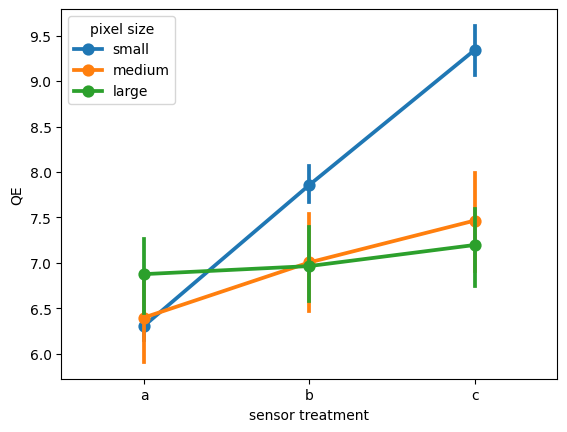

In [70]:
# s_1
# small, medium, large sensor size with coating 1
s_1 = [ np.round(i,2) for i in np.random.normal(6.3,0.5,30)];
m_1 = [ np.round(i,2) for i in np.random.normal(6.5,1.5,30)];
l_1 = [ np.round(i,2) for i in np.random.normal(6.7,1.15,30)];

# small, medium, large sensor size with coating 2
s_2 = s_1 + np.random.normal(1.5,0.5,len(s_1))
m_2 = m_1 + np.random.normal(0.6,0.5,len(s_1))
l_2 = l_1 + np.random.normal(0.1,0.15,len(s_1))

# small, medium, large sensor size with coating 3
s_3 = s_2 + np.random.normal(1.5,0.5,len(s_1))
m_3 = m_2 + np.random.normal(0.6,0.5,len(s_1))
l_3 = l_2 + np.random.normal(0.2,0.15,len(s_1))


s_1 = pd.DataFrame(s_1,columns=['QE'])
m_1 = pd.DataFrame(m_1,columns=['QE'])
l_1 = pd.DataFrame(l_1,columns=['QE'])

s_2 = pd.DataFrame(s_2,columns=['QE'])
m_2 = pd.DataFrame(m_2,columns=['QE'])
l_2 = pd.DataFrame(l_2,columns=['QE'])

s_3 = pd.DataFrame(s_3,columns=['QE'])
m_3 = pd.DataFrame(m_3,columns=['QE'])
l_3 = pd.DataFrame(l_3,columns=['QE'])

s_1['pixel size'] = 'small'
m_1['pixel size'] = 'medium'
l_1['pixel size'] = 'large'

s_2['pixel size'] = 'small'
m_2['pixel size'] = 'medium'
l_2['pixel size'] = 'large'

s_3['pixel size'] = 'small'
m_3['pixel size'] = 'medium'
l_3['pixel size'] = 'large'

s_1['sensor treatment'] = 'a'
m_1['sensor treatment'] = 'a'
l_1['sensor treatment'] = 'a'

s_2['sensor treatment'] = 'b'
m_2['sensor treatment'] = 'b'
l_2['sensor treatment'] = 'b'

s_3['sensor treatment'] = 'c'
m_3['sensor treatment'] = 'c'
l_3['sensor treatment'] = 'c'


s_1['observer id'] = np.arange(1,len(s_1)+1)
s_2['observer id'] = np.arange(1,len(s_1)+1)
s_3['observer id'] = np.arange(1,len(s_1)+1)

m_1['observer id'] = np.arange(1,len(s_1)+1)
m_2['observer id'] = np.arange(1,len(s_1)+1)
m_3['observer id'] = np.arange(1,len(s_1)+1)

l_1['observer id'] = np.arange(1,len(s_1)+1)
l_2['observer id'] = np.arange(1,len(s_1)+1)
l_3['observer id'] = np.arange(1,len(s_1)+1)

two_way_df = pd.concat([s_1, m_1, l_1, s_2, m_2, l_2, s_3, m_3,l_3])
two_way_df
sns.pointplot(two_way_df, y='QE', x='sensor treatment',hue='pixel size')

In [73]:
pg.normality(two_way_df['QE'])

,W,pval,normal
QE,0.996243,0.769642,True


In [71]:
pg.anova(two_way_df, dv='QE', between=['sensor treatment','pixel size'])

,Source,SS,DF,MS,F,p-unc,np2
0,sensor treatment,97.962584,2,48.981292,38.191393,2.828428e-15,0.226398
1,pixel size,43.581422,2,21.790711,16.990520,1.157326e-07,0.115197
2,sensor treatment * pixel size,59.299901,4,14.824975,11.559239,1.177594e-08,0.150493
3,Residual,334.738175,261,1.282522,NaN,NaN,NaN


In [72]:
pg.pairwise_tests(two_way_df, dv='QE', between=['sensor treatment', 'pixel size'],padjust='sidak')

,Contrast,sensor treatment,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,sensor treatment,-,a,b,False,True,-4.406579,178.0,two-sided,1.810638e-05,5.431815e-05,sidak,972.462,-0.654122
1,sensor treatment,-,a,c,False,True,-7.515196,178.0,two-sided,2.668064e-12,8.004264e-12,sidak,2.529e+09,-1.115572
2,sensor treatment,-,b,c,False,True,-3.551240,178.0,two-sided,4.907181e-04,1.471432e-03,sidak,49.79,-0.527154
3,pixel size,-,large,medium,False,True,0.280886,178.0,two-sided,7.791238e-01,9.892243e-01,sidak,0.168,0.041695
4,pixel size,-,large,small,False,True,-4.355966,178.0,two-sided,2.232910e-05,6.698582e-05,sidak,803.33,-0.646609
5,pixel size,-,medium,small,False,True,-4.058855,178.0,two-sided,7.375218e-05,2.212402e-04,sidak,271.772,-0.602505
6,sensor treatment * pixel size,a,large,medium,False,True,1.471458,58.0,two-sided,1.465726e-01,7.598409e-01,sidak,0.648,0.374995
7,sensor treatment * pixel size,a,large,small,False,True,2.644789,58.0,two-sided,1.049975e-02,9.062466e-02,sidak,4.533,0.674013
8,sensor treatment * pixel size,a,medium,small,False,True,0.346927,58.0,two-sided,7.299016e-01,9.999923e-01,sidak,0.276,0.088413
9,sensor treatment * pixel size,b,large,medium,False,True,-0.116246,58.0,two-sided,9.078593e-01,1.000000e+00,sidak,0.264,-0.029625


### Two-way with a within-subjects design

---



In [ ]:
pg.rm_anova(two_way_df, dv='QE', within=['sensor treatment','pixel size'],subject = 'observer id')

In [ ]:
pg.pairwise_tests(two_way_df, dv='QE', within=['sensor treatment', 'pixel size'],subject = 'observer id', padjust='sidak')

Mixed design

In [ ]:
pg.mixed_anova(two_way_df, dv='QE', between= 'pixel size',within='sensor treatment',subject = 'observer id')

In [ ]:


# small, medium, large sensor size with coating 1
s_1 = [ np.round(i,2) for i in np.random.normal(6.3,0.5,30)];
m_1 = [ np.round(i,2) for i in np.random.normal(6.5,1.5,30)];
l_1 = [ np.round(i,2) for i in np.random.normal(6.7,1.15,30)];

# small, medium, large sensor size with coating 2
s_2 = s_1 + np.random.normal(1.5,0.5,len(s_1))
m_2 = m_1 + np.random.normal(0.6,0.5,len(s_1))
l_2 = l_1 + np.random.normal(0.1,0.15,len(s_1))

# small, medium, large sensor size with coating 3
s_3 = s_2 + np.random.normal(1.5,0.5,len(s_1))
m_3 = m_2 + np.random.normal(0.6,0.5,len(s_1))
l_3 = l_2 + np.random.normal(0.2,0.15,len(s_1))

s_1 = pd.DataFrame(s_1,columns=['QE'])
m_1 = pd.DataFrame(m_1,columns=['QE'])
l_1 = pd.DataFrame(l_1,columns=['QE'])

s_2 = pd.DataFrame(s_2,columns=['QE'])
m_2 = pd.DataFrame(m_2,columns=['QE'])
l_2 = pd.DataFrame(l_2,columns=['QE'])

s_3 = pd.DataFrame(s_3,columns=['QE'])
m_3 = pd.DataFrame(m_3,columns=['QE'])
l_3 = pd.DataFrame(l_3,columns=['QE'])

s_1['pixel size'] = 'small'
m_1['pixel size'] = 'medium'
l_1['pixel size'] = 'large'

s_2['pixel size'] = 'small'
m_2['pixel size'] = 'medium'
l_2['pixel size'] = 'large'

s_3['pixel size'] = 'small'
m_3['pixel size'] = 'medium'
l_3['pixel size'] = 'large'

s_1['sensor treatment'] = 'a'
m_1['sensor treatment'] = 'a'
l_1['sensor treatment'] = 'a'

s_2['sensor treatment'] = 'b'
m_2['sensor treatment'] = 'b'
l_2['sensor treatment'] = 'b'

s_3['sensor treatment'] = 'c'
m_3['sensor treatment'] = 'c'
l_3['sensor treatment'] = 'c'

s_1['observer id'] = np.arange(1,len(s_1)+1)
s_2['observer id'] = np.arange(1,len(s_1)+1)
s_3['observer id'] = np.arange(1,len(s_1)+1)

m_1['observer id'] = np.arange(1,len(s_1)+1)
m_2['observer id'] = np.arange(1,len(s_1)+1)
m_3['observer id'] = np.arange(1,len(s_1)+1)

l_1['observer id'] = np.arange(1,len(s_1)+1)
l_2['observer id'] = np.arange(1,len(s_1)+1)
l_3['observer id'] = np.arange(1,len(s_1)+1)

two_way_df = pd.concat([s_1, m_1, l_1, s_2, m_2, l_2, s_3, m_3,l_3])

two_way_df

# sns.pointplot(two_way_df, y='QE', x='sensor treatment',hue='pixel size')

<Axes: xlabel='sensor treatment', ylabel='QE'>

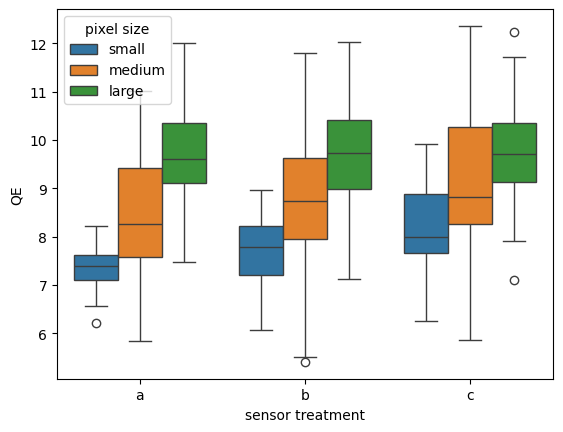

In [27]:
sns.boxplot(two_way_df, y='QE', x='sensor treatment',hue='pixel size')

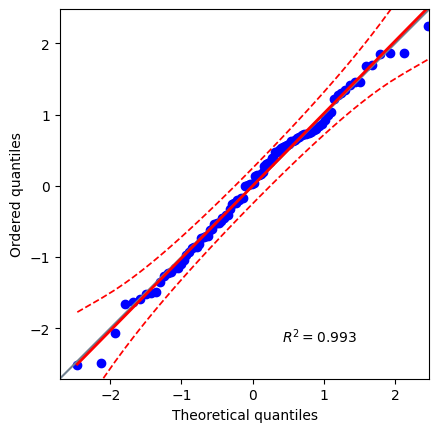

In [44]:
data = np.random.normal(1.5,0.5,100)
ax = pg.qqplot(data)

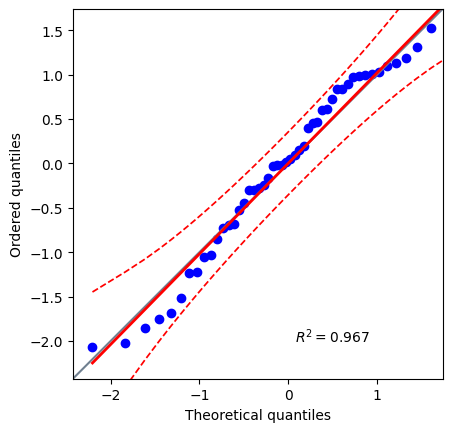

In [45]:
data = np.random.uniform(5,20,50)
ax = pg.qqplot(data)